## Importing Modules


## Importing Data

In [3]:
from google.colab import drive
drive.mount('drive')
%cd /drive

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).
[Errno 2] No such file or directory: '/drive'
/content


In [4]:
%ls

drive/  sample_data/


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = pd.read_csv("/content/drive/MyDrive/Kelas Data Scient/response_1690204437969.csv")
dfa = pd.read_csv("/content/drive/MyDrive/Kelas Data Scient/abusive.csv")

## DataFrame Preview

In [7]:
dfa

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [8]:
df

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt user user siapa yang telat ngasih tau elu e...,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,user user aku itu aku n nku tau matamu sipit t...,Negative
4,USER USER Kaum cebong kapir udah keliatan dong...,user user kaum cebong kapir udah keliatan dong...,Negative
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,user jangan asal ngomong ndasmu congor lu yg s...,Negative
13165,USER Kasur mana enak kunyuk',user kasur mana enak kunyuk,Positive
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,user hati hati bisu g n nlagi bosan huft xf0 x...,Neutral
13167,USER USER USER USER Bom yang real mudah terdet...,user user user user bom yang real mudah terdet...,Negative


In [9]:
df['Tweets_clean'] = df['Tweets_clean'].str.replace('user', '')
df.head()

,Tweet,Tweets_clean,Sentiment
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sara...,Negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...,Negative
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...,Negative


## Penghitungan Data Abusive dengan Data Tweet

In [10]:
from wordcloud import WordCloud

In [11]:
abusive_words = dfa['ABUSIVE'].tolist()

In [12]:
text = ' '.join(df['Tweets_clean'])
wordcloud = WordCloud().generate(text)

In [13]:
filtered_text = ' '.join(word for word in text.split() if word in abusive_words)

In [14]:
word_frequencies = {word: text.split().count(word) for word in abusive_words}

In [15]:
wordcloud = WordCloud().generate_from_frequencies(word_frequencies)

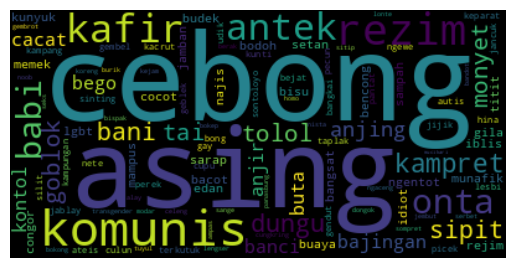

In [16]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pengaitan Abusive dengan Sentiment pada Tweet

In [17]:
abusing = dfa["ABUSIVE"]
tweet = df["Tweets_clean"]

In [18]:
def contains_abusive_word(tweet):
  return any(word in tweet.lower() for word in abusing)

In [19]:
df['Contains_Abusive_Word'] = tweet.apply(contains_abusive_word)
df['Contains_Abusive_Word'] = df['Contains_Abusive_Word'].map({True: 'Yes', False: 'No'})

In [20]:
df

,Tweet,Tweets_clean,Sentiment,Contains_Abusive_Word
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,Yes
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sara...,Negative,Yes
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,No
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,Yes
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...,Negative,Yes
...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative,Yes
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive,Yes
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral,Yes
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang te...,Negative,No


In [21]:
in1 = df[(df['Sentiment'] == 'Positive') & (df['Contains_Abusive_Word'] == 'Yes')]
in2 = df[(df['Sentiment'] == 'Neutral') & (df['Contains_Abusive_Word'] == 'Yes')]
in3 = df[(df['Sentiment'] == 'Negative') & (df['Contains_Abusive_Word'] == 'No')]

In [22]:
def classify_accuracy(df):
    if df['Sentiment'] in ['Positive', 'Neutral'] and df['Contains_Abusive_Word'] == 'Yes':
        return 'Inaccurate'
    elif df['Sentiment'] == 'Negative' and df['Contains_Abusive_Word'] == 'No':
        return 'Inaccurate'
    else:
        return 'Accurate'

In [25]:
df['Accuracy'] = df.apply(classify_accuracy, axis=1)

In [26]:
df

,Tweet,Tweets_clean,Sentiment,Contains_Abusive_Word,Accuracy
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,Negative,Yes,Accurate
1,RT USER: USER siapa yang telat ngasih tau elu?...,rt siapa yang telat ngasih tau elu edan sara...,Negative,Yes,Accurate
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,Negative,No,Inaccurate
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku n nku tau matamu sipit tapi dili...,Negative,Yes,Accurate
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya da...,Negative,Yes,Accurate
...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,jangan asal ngomong ndasmu congor lu yg sekat...,Negative,Yes,Accurate
13165,USER Kasur mana enak kunyuk',kasur mana enak kunyuk,Positive,Yes,Inaccurate
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,hati hati bisu g n nlagi bosan huft xf0 x9f x...,Neutral,Yes,Inaccurate
13167,USER USER USER USER Bom yang real mudah terdet...,bom yang real mudah terdeteksi bom yang te...,Negative,No,Inaccurate


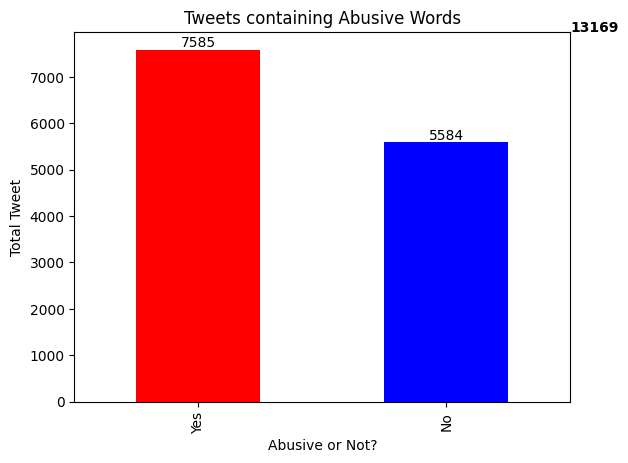

In [28]:
contains_abusive_counts = df['Contains_Abusive_Word'].value_counts()

# Create a bar plot
contains_abusive_counts.plot(kind='bar', color=['red', 'blue'])

# Add labels to the bars
for index, value in enumerate(contains_abusive_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

# Add title and labels to the plot
plt.title('Tweets containing Abusive Words')
plt.xlabel("Abusive or Not?")
plt.ylabel("Total Tweet")

text = df["Tweets_clean"].count()
plt.text(1, 1, text, transform=plt.gca().transAxes, fontsize=10, color='black', fontweight="bold")
# Show the bar plot
plt.show()

## Persentase Negative & Positive based on ayameRushia

<Axes: ylabel='Sentiment'>

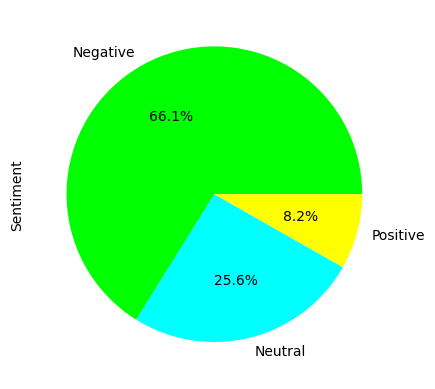

In [29]:
df.groupby('Sentiment').Sentiment.count().plot(kind='pie',autopct='%1.1f%%',colors=['lime','aqua','yellow'])

In [30]:
df['Sentiment'].value_counts()

Negative    8710
Neutral     3376
Positive    1083
Name: Sentiment, dtype: int64

In [31]:
Sentiment_counts = df['Sentiment'].value_counts()

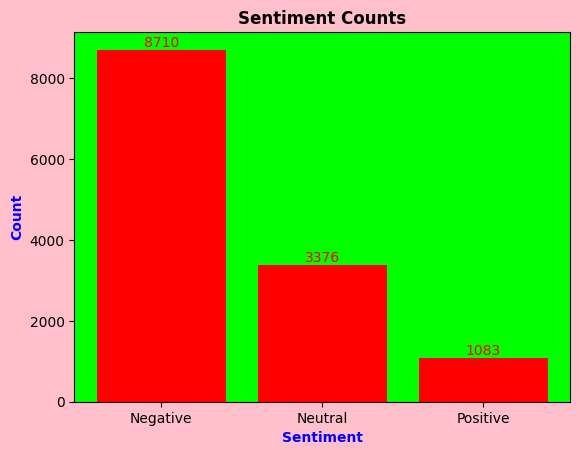

In [33]:
# Create the bar plot
plt.figure(facecolor='pink')
plt.subplot(facecolor='lime')
plt.bar(Sentiment_counts.index, Sentiment_counts, color='red')

# Add labels to the bars
for i, count in enumerate(Sentiment_counts):
    plt.text(i, count, str(count), ha='center', va='bottom',color='red')

# Add axis labels and title
plt.xlabel('Sentiment',color="blue",fontweight="bold")
plt.ylabel('Count', color="blue",fontweight='bold')
plt.title('Sentiment Counts',fontweight='bold')

# Show the plot
plt.show()